#### 【 연속확률분포 (Continuous Distribution) 】

[ 모수(parameter)의 2가지 의미]
- 모집단의 특성을 나타내는 수치 → μ, σ², p …
- 확률분포의 모양을 결정하는 수치 → 정규(μ, σ), t(df), χ²(df), F(df1, df2)

[ 자유도(df: degrees of freedom)란]
- 모델 또는 데이터가 자유롭게 움직일 수 있는 독립 정보의 개수
- 예시
    * 표본 10개 → 평균을 계산한 뒤 나머지 9개만 자유롭게 변화 가능
    * χ²에서 표준정규 제곱이 몇 개 합쳐졌는지 → 그 개수가 df
    * ANOVA에서 그룹 수 – 1, 전체 표본 – 그룹 수 등
- 자유도 크기
    * 데이터가 얼마나 많이 들어갔는가
    * 변동을 결정하는 독립 정보가 몇 개인가
    * df↑ = 정보↑ = 불확실성↓ = 정규분포처럼 매끈해짐

[4] t-분포 (Student’s t Distribution) <hr>
- 표본 크기가 작고(보통 n < 30), 모분산을 모를 때 **평균의 추론에 사용하는 분포**
- 예시
    * 남학생과 여학생의 평균 점수 차이가 유의미한가?
    * 우리 반 평균 키가 165cm인가?
    * A반과 B반의 평균 점수가 다를까?
    * 교육 전·후 평균 점수가 달라졌나?”
    * 이 집단의 평균은 95% 신뢰수준에서 (72점, 81점) 사이이다.
- 정의 : 
    * $$ T = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}  $$
    * X bar: 표본평균, μ0 : 가설의 평균(예: 0, 70 등)
    * S : 표본표준편차, n : 표본 크기,  𝑇 ∼ 𝑡𝑛−1
- 결과값 : 표본평균이 평균(μ₀)에서 몇 표준오차만큼 떨어져 있는지 나타냄
    * |T|가 크다 → 표본평균이 μ₀랑 꽤 다르다. → 평균 차이가 크다고 주장 가능
    * |T|가 작다 → 표본평균이 μ₀ 근처에 있다. → 차이가 없다고 보기 쉬움

- 특징
    * 평균 0
    * 꼬리가 두꺼움(표본이 적을 때 불확실성이 더 크기 때문)
    * 자유도(df) 증가 → 정규분포에 점점 가까워짐

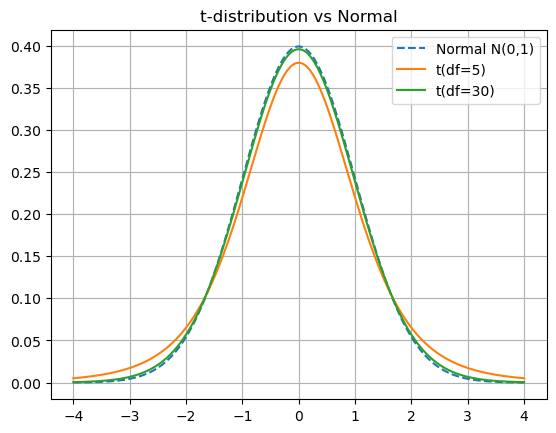

In [1]:
# 모듈 로딩
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# 데이터 
x = np.linspace(-4, 4, 300)

# 시각화
plt.plot(x, norm.pdf(x), '--', label='Normal N(0,1)')
plt.plot(x, t.pdf(x, df=5), label='t(df=5)')
plt.plot(x, t.pdf(x, df=30), label='t(df=30)')

plt.title("t-distribution vs Normal")
plt.legend()
plt.grid(True)
plt.show()

[2] 카이제곱분포(Chi-square, χ² Distribution) <hr>
- 0 이상에서 정의
- 오른쪽으로 크게 치우침
- 독립 정규분포 제곱합의 분포
- 예시
    * 분산에 대한 추론
    * 카이제곱 독립성 검정 (교차표)
    * 카이제곱 적합도 검정 (다항비교)
- 분산(변동성)과 관련된 것들을 검정하거나, 범주형 데이터의 ‘차이/연관성’ 검정할 경우
- 예:
    * 모분산이 얼마인지 추론하고 싶을 때
    * 관측된 범주형 데이터가 기대한 비율과 맞는지 (적합도 검정)
    * 두 범주형 변수(예: 성별 vs 합격 여부)가 독립인지 (독립성 검정)
    * 여러 변수의 상관구조를 다룰 때(공분산 행렬 관련)
- 정의 : χ2=Z12​+Z22​+⋯+Zk2​(Zi​∼N(0,1))
- 정의
    * $$ \chi^2 = Z_1^2 + Z_2^2 + \cdots + Z_k^2 \sim \chi^2_k $$


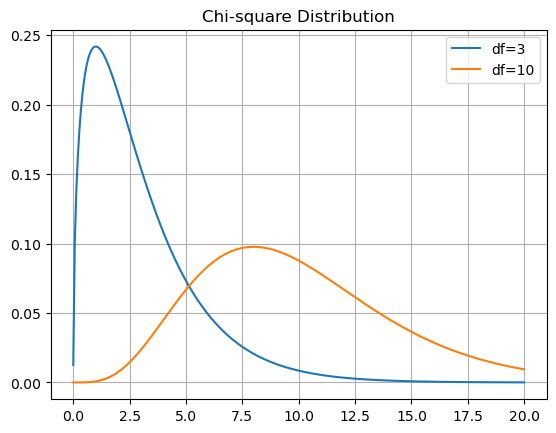

In [3]:
# 모듈로딩
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 임시데이터
x = np.linspace(0.001, 20, 300)

# 시각화 
plt.plot(x, chi2.pdf(x, df=3), label='df=3')
plt.plot(x, chi2.pdf(x, df=10), label='df=10')

plt.title("Chi-square Distribution")
plt.legend()
plt.grid(True)
plt.show()

[3] F-분포 (F Distribution) <hr>
- 양수만 존재
- 두 개의 분산을 비교하거나, 여러 집단 간 평균 차이를 한꺼번에 검정할 때
- 오른쪽 꼬리가 긴 형태
- 예시
    * 두 집단 이상의 평균 차이를 동시에 검정(ANOVA)
    * A반/B반/C반 평균에 차이가 있는가?
    * 회귀모형 전체가 의미 있는지 검정(F-test)
    * 두 분산(또는 여러 분산)의 차이를 검정
- 정의
    * 카이제곱(제곱합)을 자유도로 나눈 값의 비율
    * $$ F = \frac{X_1/d_1}{X_2/d_2} \sim F_{d_1, d_2} $$
    * d_1 분자: 어떤 변동(예: 집단 간 차이)
    * d_2 분모: 다른 변동(예: 집단 내 오차)
- F 값 의미
    * F 값이 크다 : 분자 쪽 변동이 분모 쪽 변동보다 상대적으로 크다

- 사용 예
    * 분산비 검정
    * ANOVA(분산분석)
    * 회귀모형 전체 검정(F-test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

x = np.linspace(0.001, 5, 300)

plt.plot(x, f.pdf(x, dfn=5, dfd=10), label='df1=5, df2=10')
plt.plot(x, f.pdf(x, dfn=10, dfd=10), label='df1=10, df2=10')

plt.title("F Distribution")
plt.legend()
plt.grid(True)
plt.show()

- **t-분포**
    - 의미 : 평균 추론용
    - 적용 : 표본 적고 모분산 모를 경우
    - 활용 : t-검정, 회귀계수  
- **카이제곱(χ²)** 
    - 의미 : 제곱합/변동
    - 사용이유 : 분산 추론용
    - 활용 : 독립성검정, 적합도, 분산

- **F-분포**
    - 의미 : 변동의 비율
    - 적용 : 분산비 비교 
    - 활용 : ANOVA, 회귀 전체 검정